In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.optimize
from scipy.misc import derivative
import numpy as np
from matplotlib import ticker
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose

In [173]:
df = pd.read_csv('clean_data.csv')
df.tail(3)

,fips,id,year,element,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,country
1369344,ZI,ZIXLT622116,2008,TAVG,20.01,19.99,18.53,16.71,15.32,13.16,12.87,15.28,18.51,22.10,21.28,20.65,Zimbabwe
1369345,ZI,ZIXLT622116,2009,TAVG,20.61,20.76,19.08,16.70,15.10,13.93,12.03,14.76,18.33,21.35,19.72,21.48,Zimbabwe
1369346,ZI,ZIXLT622116,2010,TAVG,21.50,21.84,20.34,18.48,16.40,12.78,13.04,14.11,19.34,22.04,21.38,20.55,Zimbabwe


In [174]:
year_group = df.groupby('year').mean()
year_group.head(3)


C:\Users\Fiona A\AppData\Local\Temp\ipykernel_10176\100017286.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_group = df.groupby('year').mean()


,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
1961,6.596503,7.262983,8.149934,10.391513,14.239515,18.630701,20.140119,19.947319,16.634087,12.407242,7.701463,6.573764
1962,6.779029,7.716334,6.589528,11.027285,14.915314,17.820533,19.505686,19.516880,16.199104,12.679688,8.207250,5.636804
1963,7.425451,7.404904,7.922432,10.832225,14.817056,18.084707,20.196644,19.568654,17.018353,13.754391,8.735997,5.802251


In [175]:
year_group.tail(3)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
2008,6.559138,7.066439,7.560139,10.941591,14.715230,18.777355,20.771910,20.030814,16.874004,12.368371,8.431280,6.936121
2009,7.215377,7.173510,7.869725,11.302941,15.344572,18.397438,20.316735,20.215064,17.615987,11.171096,9.531471,6.582886
2010,6.556713,6.508815,8.429566,11.945247,15.021387,18.986477,21.354238,20.670111,17.247374,12.713146,7.756206,6.311810


In [176]:
y = np.array(year_group)

flat__y = np.concatenate(y)
flat_y = flat__y[:468]
flat_y.shape

(468,)

In [177]:
x = [t for t in range(468)]
t = np.array(x)
t.shape

(468,)

In [178]:
def polynomial_function(t, a, b, c, d):
    out = 0
    #print(t, type(t))
    out += (a*t)*(a*t)
    out += b*t
    out += c
    out += d * np.sin(2 * np.pi / 12 * t + np.pi/2)
    
    return  out

In [179]:
""" 
def polynomial_function(t, a, b, c, d, e):
    out = 0
    #print(t, type(t))
    out += (a*t)*(a*t)
    out += b*t
    out += c
    out += d * np.sin(2 * np.pi / 12 * t + e)
    
    return  out

    """

' \ndef polynomial_function(t, a, b, c, d, e):\n    out = 0\n    #print(t, type(t))\n    out += (a*t)*(a*t)\n    out += b*t\n    out += c\n    out += d * np.sin(2 * np.pi / 12 * t + e)\n    \n    return  out\n\n    '

In [180]:
df = year_group.stack()
df = df.reset_index()
df.columns = ['Year', 'Month', 'Temperature']

In [181]:
select = df['Year'] <= 1999
datafr = df[select]
datafr

,Year,Month,Temperature
0,1961,jan,6.596503
1,1961,feb,7.262983
2,1961,mar,8.149934
3,1961,apr,10.391513
4,1961,may,14.239515
...,...,...,...
463,1999,aug,20.140743
464,1999,sep,17.122171
465,1999,oct,12.364928
466,1999,nov,9.376570


In [182]:
datafr['month_year'] = datafr['Month'] + '-' + datafr['Year'].astype(str)

C:\Users\Fiona A\AppData\Local\Temp\ipykernel_10176\1705555067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafr['month_year'] = datafr['Month'] + '-' + datafr['Year'].astype(str)


In [183]:
dataframe = datafr[['Temperature', 'month_year']]
dataframe

,Temperature,month_year
0,6.596503,jan-1961
1,7.262983,feb-1961
2,8.149934,mar-1961
3,10.391513,apr-1961
4,14.239515,may-1961
...,...,...
463,20.140743,aug-1999
464,17.122171,sep-1999
465,12.364928,oct-1999
466,9.376570,nov-1999


In [184]:
popt, pcov = scipy.optimize.curve_fit(polynomial_function, xdata = t, ydata =flat_y)

fitted_curve = polynomial_function(t, *popt)


In [185]:
(np.abs(fitted_curve-flat_y)).mean()

0.9720207463379211

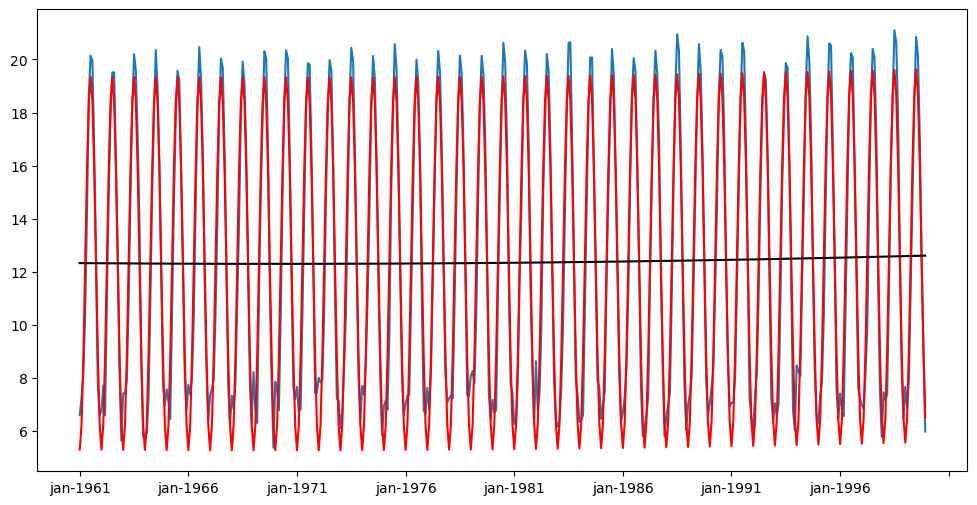

In [186]:
# Plotting the original time series 
plt.figure(figsize=(12, 6))
plt.plot(flat_y)


num_ticks = 10
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))


# Fit the polynomial using curve_fit
popt, pcov = scipy.optimize.curve_fit(polynomial_function, xdata = t, ydata =flat_y)
# Generate the fitted curve using the optimized parameters
fitted_curve = polynomial_function(t, *popt)

a_popt, b_popt, c_popt, d_popt = popt
fitted_curve_without_cycle =  polynomial_function(t, a_popt, b_popt, c_popt, 0)

# Plotting fitted curve

plt.plot(dataframe['month_year'], fitted_curve, color='red', label='Fitted Polynomial')
plt.plot(dataframe['month_year'], fitted_curve_without_cycle, color='black', label='Fitted Polynomial')

plt.show()

In [187]:
a_popt, b_popt, c_popt, d_popt


(0.0015563651208524204,
 -0.0005282264935566508,
 12.326744704683845,
 -7.023441925120287)

In [188]:

y_pred = np.array([polynomial_function(month, a_popt, b_popt, c_popt, d_popt) for month in range(468, 600)])
y_pred_trend = np.array([polynomial_function(month, a_popt, b_popt, c_popt, 0) for month in range(468, 600)])

len(y_pred)

132

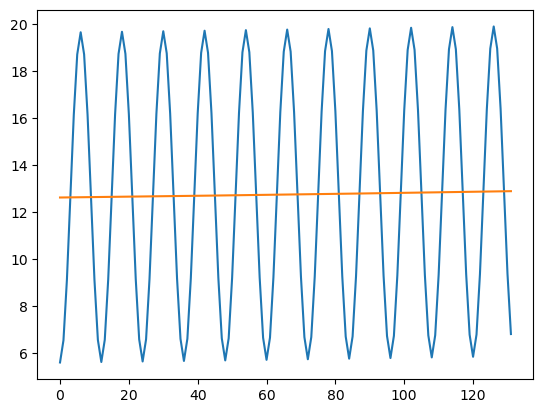

In [189]:
plt.plot(y_pred)
plt.plot(y_pred_trend)

In [190]:
x = [t for t in range(132)]
t1 = np.array(x)
t1.shape

(132,)

In [191]:
selection = df['Year'] >= 2000
datafra = df[selection]
datafra['month_year'] = datafra['Month'] + '-' + datafra['Year'].astype(str)
dataframe1 = datafra[['Temperature', 'month_year']]
dataframe1

C:\Users\Fiona A\AppData\Local\Temp\ipykernel_10176\2771522776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafra['month_year'] = datafra['Month'] + '-' + datafra['Year'].astype(str)


,Temperature,month_year
468,6.801839,jan-2000
469,6.935117,feb-2000
470,8.593973,mar-2000
471,11.626749,apr-2000
472,15.585378,may-2000
...,...,...
595,20.670111,aug-2010
596,17.247374,sep-2010
597,12.713146,oct-2010
598,7.756206,nov-2010


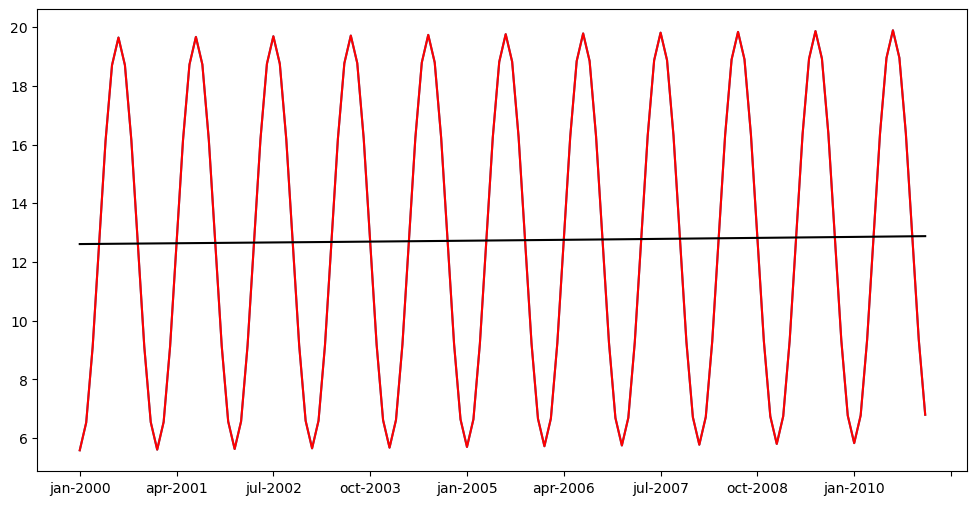

In [192]:
# Plotting the original time series 
plt.figure(figsize=(12, 6))
plt.plot(y_pred)


num_ticks = 10
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))


# Fit the polynomial using curve_fit
popt, pcov = scipy.optimize.curve_fit(polynomial_function, xdata = t1, ydata =y_pred)
# Generate the fitted curve using the optimized parameters
fitted_curve = polynomial_function(t1, *popt)

a_popt, b_popt, c_popt, d_popt = popt
fitted_curve_without_cycle = polynomial_function(t1, a_popt, b_popt, c_popt, 0)

# Plotting fitted curve

plt.plot(dataframe1['month_year'], fitted_curve, color='red', label='Fitted Polynomial')
plt.plot(dataframe1['month_year'], fitted_curve_without_cycle, color='black', label='Fitted Polynomial')

plt.show()

In [239]:
def mse(aaa, bbb):
    mse = ((aaa-bbb)**2).mean()
    return mse 

In [258]:
def mse_try(aaa, bbb, n):
    mse = sum((aaa-bbb)**2)/n
    return mse 

In [240]:
x468 = [t for t in range(468)]
t468 = np.array(x468)


In [241]:
x132 = [t for t in range(132)]
t132 = np.array(x132)
len(t132)

132

In [242]:
x600 = [t for t in range(600)]
t600 = np.array(x600)


In [243]:
y = np.array(year_group)

flat_y600 = np.concatenate(y)

In [244]:
y = np.array(year_group)

flat__y = np.concatenate(y)
flat_y468 = flat__y[:468]
flat_y132 = flat__y[468:600]

In [245]:
y_pred468 = np.array([polynomial_function(month, a_popt, b_popt, c_popt, d_popt) for month in range(468)])
y_pred600 = np.array([polynomial_function(month, a_popt, b_popt, c_popt, d_popt) for month in range(600)])

In [246]:
mse468 = mse(flat_y468, y_pred468)
mse468

2.10022516167996

In [247]:
mse600 = mse(flat_y600, y_pred600)
mse600

2.383809438429226

In [248]:
mse(flat_y600[-132:], y_pred600[-132:])


3.3892446014493505

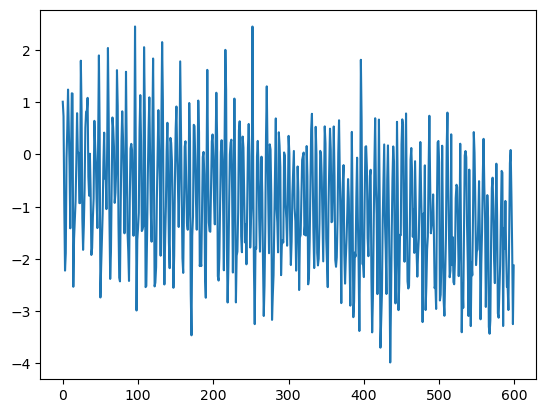

In [249]:
plt.plot((flat_y600 - y_pred600))

## Year error

In [250]:
year = df.groupby(df['Year'])['Temperature'].mean()
years = year.to_frame()

In [251]:
y = np.array(years)

flat__y = np.concatenate(y)
flat_y2000 = flat__y[:40]

In [253]:
y = np.array(years)
flat_y2010 = np.concatenate(y)


In [255]:
flat_y0010 = flat_y2010[-10:]

In [262]:
y_pred2000 = np.array([polynomial_function(month, a_popt, b_popt, c_popt, 0) for month in range(40)])
y_pred2010 = np.array([polynomial_function(month, a_popt, b_popt, c_popt, 0) for month in range(50)])
y_pred0010 = np.array([polynomial_function(month, a_popt, b_popt, c_popt, 0) for month in range(40,50)])

In [263]:
mse1 = mse(flat_y2000, y_pred2000)
mse2 = mse(flat_y2010, y_pred2010)
mse3 = mse(flat_y0010, y_pred0010)

mse1, mse2, mse3

(0.10775433316962339, 0.08921173977918205, 0.015041366217416637)